<p><img alt="UNQ logo" height="45px" src="http://www.unq.edu.ar/images/logo_unqui_footer.png" align="left" hspace="10px" vspace="0px"></p><h1>Redes Neuronales y Lógica Difusa</h1>

# Clasificación de imagenes con K-Means

Importo módulos a utilizar

In [1]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans

Using TensorFlow backend.


Importo el dataset MNIST

Datos de entrenamiento: (60000, 28, 28)
Etiquetas de datos de entrenamiento: (60000,)
Datos de prueba: (10000, 28, 28)
Etiquetas de datos de prueba: (10000,)


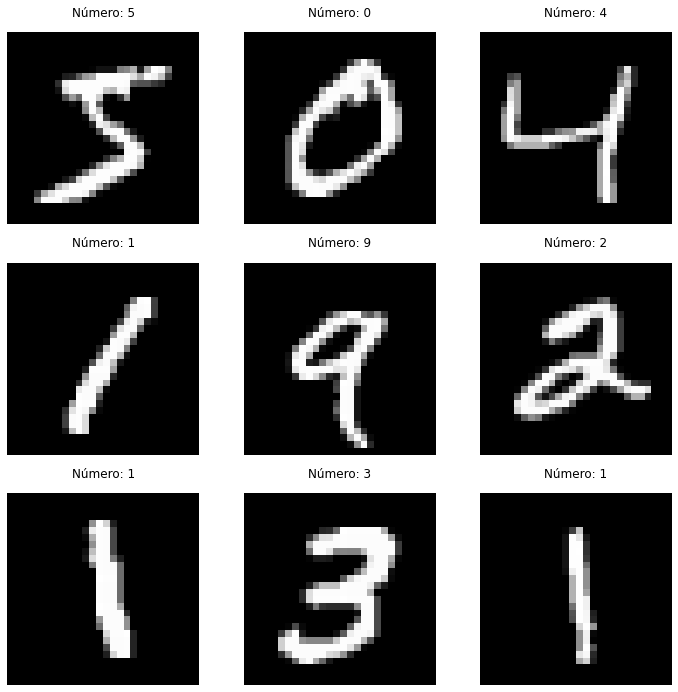

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Datos de entrenamiento: {}'.format(x_train.shape))
print('Etiquetas de datos de entrenamiento: {}'.format(y_train.shape))

print('Datos de prueba: {}'.format(x_test.shape))
print('Etiquetas de datos de prueba: {}'.format(y_test.shape))

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Número: {}'.format(y_train[i]))

fig.show()

Preproceso las imágenes

In [3]:
X = x_train.reshape(len(x_train),-1)
Y = y_train

# Normalizo los datos

X = X.astype(float) / 255.

print(X.shape)

(60000, 784)


Inicio el K-Means

In [4]:
n_digits = len(np.unique(y_test))
print("Número de etiquetas: " + str(n_digits))

# Inicializo y fiteo el algoritmo KMeans
kmeans = MiniBatchKMeans(n_clusters = n_digits)
kmeans.fit(X)

Número de etiquetas: 10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Funciones de asignación de etiquetas a los clusters

In [5]:
def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}

  for i in range(kmeans.n_clusters):

      # Busco el indice de los puntos del cluster
      labels = []
      index = np.where(kmeans.labels_ == i)

      # Agrego la etiqueta actual a cada punto del cluster
      labels.append(actual_labels[index])

      # Determino la etiqueta más común
      if len(labels[0]) == 1:
          counts = np.bincount(labels[0])
      else:
          counts = np.bincount(np.squeeze(labels))

      # Asigno el cluster a un valor en el diccionario inferred_labels
      if np.argmax(counts) in inferred_labels:
          # Agrego el número nuevo al array existente en esta posición
          inferred_labels[np.argmax(counts)].append(i)
      else:
          # Creo un array nuevo en esta posición
          inferred_labels[np.argmax(counts)] = [i]
  return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
  # Creo un array con ceros de tamaño len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
      for key, value in cluster_labels.items():
          if cluster in value:
              predicted_labels[i] = key
              
  return predicted_labels

# Pruebo las funciones infer_cluster_labels() e infer_data_labels()

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[8 0 4 1 9 2 1 8 1 9 8 1 3 6 1 7 2 8 6 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


Optimizo y evalúo el KMeans

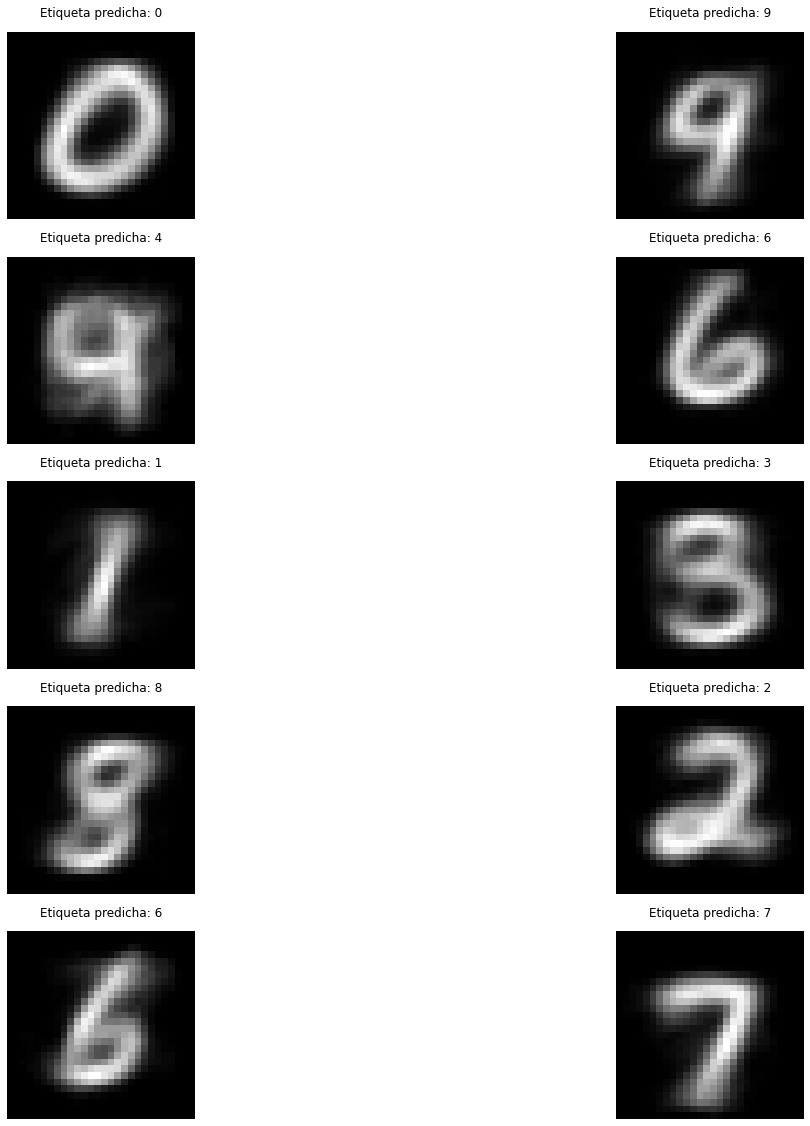

In [6]:
# Recorro los centroides
centroids = kmeans.cluster_centers_

# Hago un reshape a los centroides a imagenes
images = centroids.reshape(n_digits, 28, 28)
images *= 255
images = images.astype(np.uint8)

# Determino la etiqueta de los clusters
cluster_labels = infer_cluster_labels(kmeans, Y)

# Creo una figura con subplots usando matplotlib.pyplot
fig, axs = plt.subplots(5, 2, figsize = (20, 20))
plt.gray()

# Hago un bucle recorriendo los subplots agregando las imagenes de los centroides
for i, ax in enumerate(axs.flat):
    
    # determino la etiqueta predicha usando el diccionario cluster_labels
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Etiqueta predicha: {}'.format(key))
    
    # Agrego la imagen al subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# Muestro la figura
fig.show()

## Referencias

https://medium.com/datadriveninvestor/k-means-clustering-for-imagery-analysis-56c9976f16b6